In [1]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import probplot, shapiro
from sklearn.neural_network import MLPRegressor

In [2]:
#load dataset
population = pd.read_csv("C:/Users/arsal/Downloads/FY016.20231024T121053.csv")

In [3]:
# Check the first 5 rows of the data
population.head()

,Statistic Label,CensusYear,Sex,Age Group,Birthplace,UNIT,VALUE
0,Population Usually Resident and Present in the...,2011,Both sexes,All ages,All countries,Number,4525281.0
1,Population Usually Resident and Present in the...,2011,Both sexes,All ages,Ireland - county of usual residence,Number,2825408.0
2,Population Usually Resident and Present in the...,2011,Both sexes,All ages,Ireland - county other than county of usual re...,Number,933103.0
3,Population Usually Resident and Present in the...,2011,Both sexes,All ages,Northern Ireland,Number,58470.0
4,Population Usually Resident and Present in the...,2011,Both sexes,All ages,Scotland,Number,17871.0


In [4]:
# Understanding the basic statistics
population.describe()

,CensusYear,VALUE
count,19926.000000,1.992600e+04
mean,2016.333333,5.979170e+03
std,4.497025,9.428216e+04
min,2011.000000,-4.563800e+04
25%,2011.000000,0.000000e+00
50%,2016.000000,2.800000e+01
75%,2022.000000,1.590000e+02
max,2022.000000,5.084879e+06


In [5]:
# Check for null values
population.isnull().sum()

Statistic Label    0
CensusYear         0
Sex                0
Age Group          0
Birthplace         0
UNIT               0
VALUE              0
dtype: int64

In [6]:
#number of rows and columns in dataset
population.shape

(19926, 7)

In [7]:
# data type of each column
population.dtypes

Statistic Label     object
CensusYear           int64
Sex                 object
Age Group           object
Birthplace          object
UNIT                object
VALUE              float64
dtype: object

In [8]:
# basic info of data
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19926 entries, 0 to 19925
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  19926 non-null  object 
 1   CensusYear       19926 non-null  int64  
 2   Sex              19926 non-null  object 
 3   Age Group        19926 non-null  object 
 4   Birthplace       19926 non-null  object 
 5   UNIT             19926 non-null  object 
 6   VALUE            19926 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.1+ MB


In [9]:
unique_statistic_labels = population["Statistic Label"].unique()
print(unique_statistic_labels)

['Population Usually Resident and Present in the State'
 'Actual change since previous census'
 'Percentage change since previous census']


In [10]:
# Filtering the dataframe based on the condition to select only Population Usually Resident and Present in the State
filtered_population = population[population['Statistic Label'] == 'Population Usually Resident and Present in the State']

In [11]:
# Display the first 5 rows
filtered_population.head()

,Statistic Label,CensusYear,Sex,Age Group,Birthplace,UNIT,VALUE
0,Population Usually Resident and Present in the...,2011,Both sexes,All ages,All countries,Number,4525281.0
1,Population Usually Resident and Present in the...,2011,Both sexes,All ages,Ireland - county of usual residence,Number,2825408.0
2,Population Usually Resident and Present in the...,2011,Both sexes,All ages,Ireland - county other than county of usual re...,Number,933103.0
3,Population Usually Resident and Present in the...,2011,Both sexes,All ages,Northern Ireland,Number,58470.0
4,Population Usually Resident and Present in the...,2011,Both sexes,All ages,Scotland,Number,17871.0


In [12]:
# new data shape
filtered_population.shape

(6642, 7)

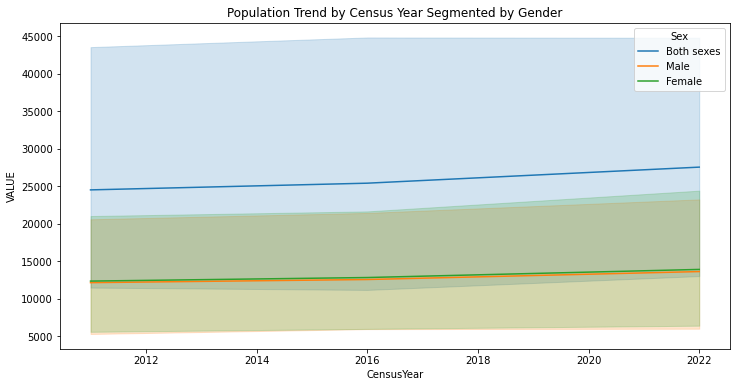

In [13]:
plt.figure(figsize=(12,6))
sns.lineplot(data=filtered_population, x="CensusYear", y="VALUE", hue="Sex")
plt.title("Population Trend by Census Year Segmented by Gender")
plt.show()

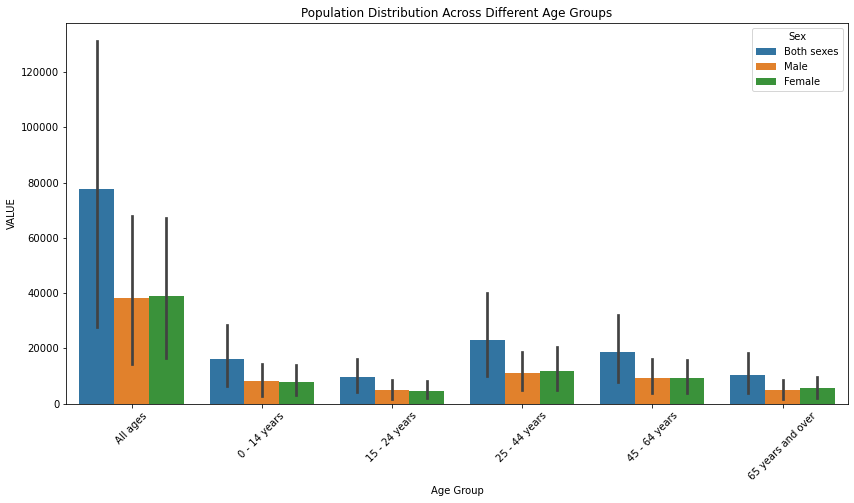

In [14]:
plt.figure(figsize=(14,7))
sns.barplot(data=filtered_population, x="Age Group", y="VALUE", hue="Sex")
plt.title("Population Distribution Across Different Age Groups")
plt.xticks(rotation=45)
plt.show()

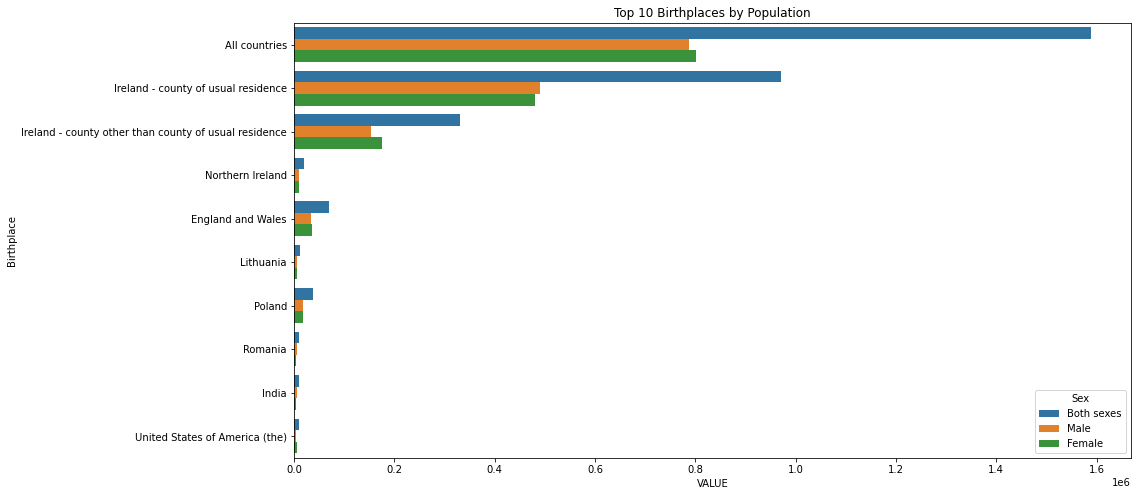

In [15]:
plt.figure(figsize=(15,8))
top_birthplaces = filtered_population.groupby("Birthplace")["VALUE"].sum().nlargest(10).index
sns.barplot(data=filtered_population[filtered_population['Birthplace'].isin(top_birthplaces)], 
            y="Birthplace", x="VALUE", hue="Sex", ci=None)
plt.title("Top 10 Birthplaces by Population")
plt.show()

In [16]:
gender_distribution = filtered_population.groupby("Sex")["VALUE"].sum()
gender_distribution

Sex
Both sexes    57200324.0
Female        28880968.0
Male          28319356.0
Name: VALUE, dtype: float64

In [17]:
major_age_groups = ["0 - 14 years", "15 - 24 year", "25 - 54 years", "55 - 64 years", "65 years and over"]
for age_group in major_age_groups:
    subset = filtered_population[filtered_population["Age Group"] == age_group]
    total = subset["VALUE"].sum()
    print(f"Total population for {age_group}: {total}")

Total population for 0 - 14 years: 11921744.0
Total population for 15 - 24 year: 0.0
Total population for 25 - 54 years: 0.0
Total population for 55 - 64 years: 0.0
Total population for 65 years and over: 7692084.0


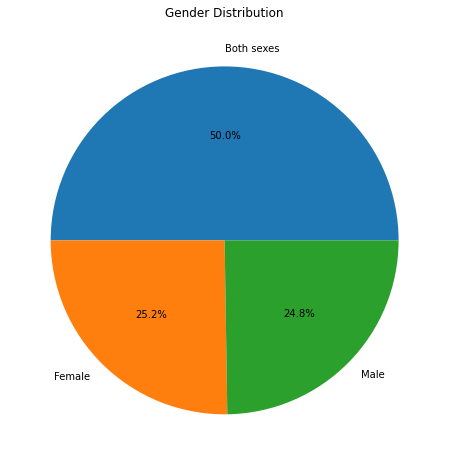

In [18]:
gender_counts = filtered_population.groupby('Sex')['VALUE'].sum()
plt.figure(figsize=(8,8))
gender_counts.plot.pie(autopct="%.1f%%")
plt.title("Gender Distribution")
plt.ylabel('')
plt.show()

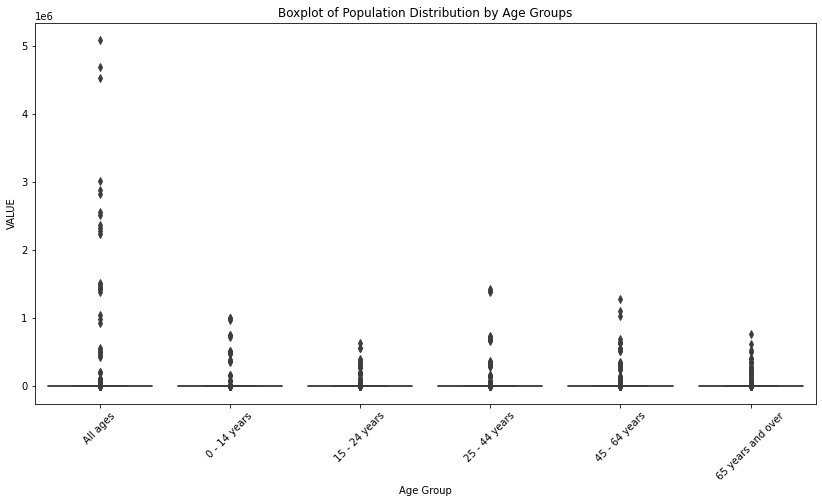

In [19]:
plt.figure(figsize=(14,7))
sns.boxplot(data=filtered_population, x='Age Group', y='VALUE')
plt.title("Boxplot of Population Distribution by Age Groups")
plt.xticks(rotation=45)
plt.show()

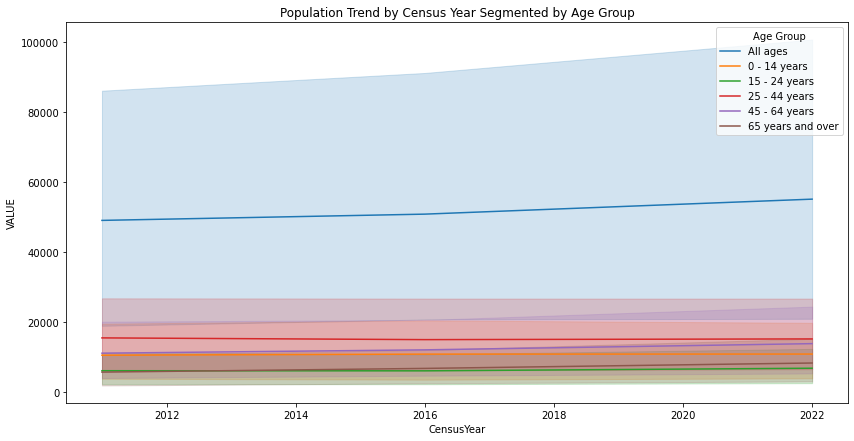

In [20]:
plt.figure(figsize=(14,7))
sns.lineplot(data=filtered_population, x='CensusYear', y='VALUE', hue='Age Group')
plt.title("Population Trend by Census Year Segmented by Age Group")
plt.show()

In [21]:
non_ireland_population = filtered_population[~filtered_population['Birthplace'].str.contains("Ireland")]
top_non_ireland_birthplaces = non_ireland_population.groupby('Birthplace')['VALUE'].sum().nlargest(10)
top_non_ireland_birthplaces

Birthplace
All countries                     57200324.0
England and Wales                  2503672.0
Poland                             1345988.0
Lithuania                           409732.0
India                               381868.0
United States of America (the)      362448.0
Romania                             356628.0
Brazil                              258600.0
Latvia                              237240.0
Nigeria                             227632.0
Name: VALUE, dtype: float64

In [22]:
# Descriptive statistics
filtered_population.describe()

,CensusYear,VALUE
count,6642.000000,6.642000e+03
mean,2016.333333,1.722383e+04
std,4.497251,1.625123e+05
min,2011.000000,0.000000e+00
25%,2011.000000,4.500000e+01
50%,2016.000000,1.750000e+02
75%,2022.000000,7.567500e+02
max,2022.000000,5.084879e+06


In [23]:
# Median value
median_value = filtered_population['VALUE'].median()
print(f"\nMedian of the Population: {median_value}")


Median of the Population: 175.0


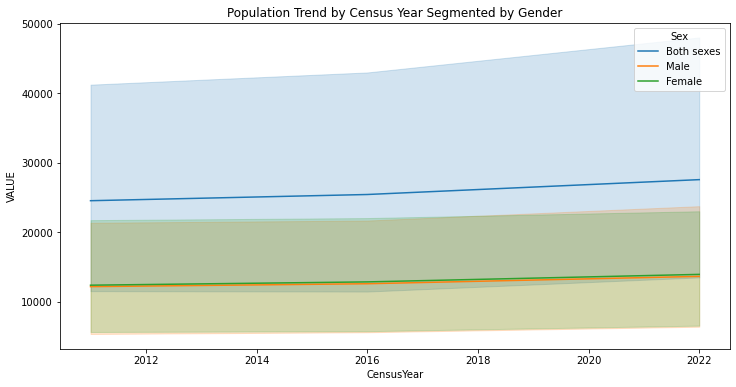

In [24]:
plt.figure(figsize=(12,6))
sns.lineplot(data=filtered_population, x="CensusYear", y="VALUE", hue="Sex")
plt.title("Population Trend by Census Year Segmented by Gender")
plt.show()

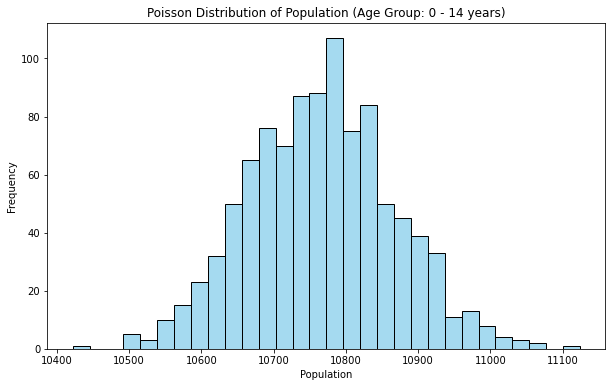

In [25]:
# Using Poisson distribution to model the population from a specific age group
data_age_group = filtered_population[filtered_population["Age Group"] == "0 - 14 years"]['VALUE']
mu = data_age_group.mean()
poisson_data = poisson.rvs(mu=mu, size=1000)
plt.figure(figsize=(10,6))
sns.histplot(poisson_data, bins=30, kde=False, color='skyblue')
plt.title("Poisson Distribution of Population (Age Group: 0 - 14 years)")
plt.xlabel("Population")
plt.ylabel("Frequency")
plt.show()

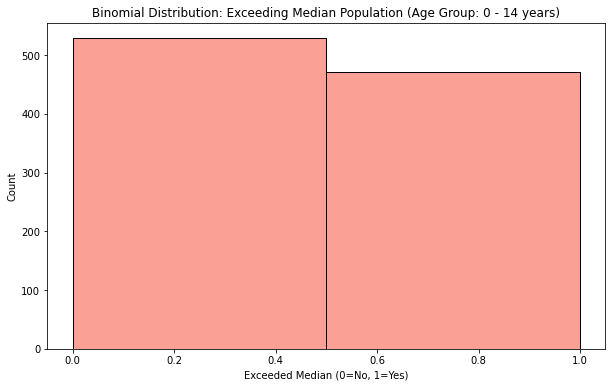

In [26]:
median_population = data_age_group.median()
n_years = len(data_age_group)
p_success = sum(data_age_group > median_population) / n_years
binomial_data = binom.rvs(n=1, p=p_success, size=1000)
plt.figure(figsize=(10,6))
sns.histplot(binomial_data, bins=2, kde=False, color='salmon')
plt.title("Binomial Distribution: Exceeding Median Population (Age Group: 0 - 14 years)")
plt.xlabel("Exceeded Median (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()

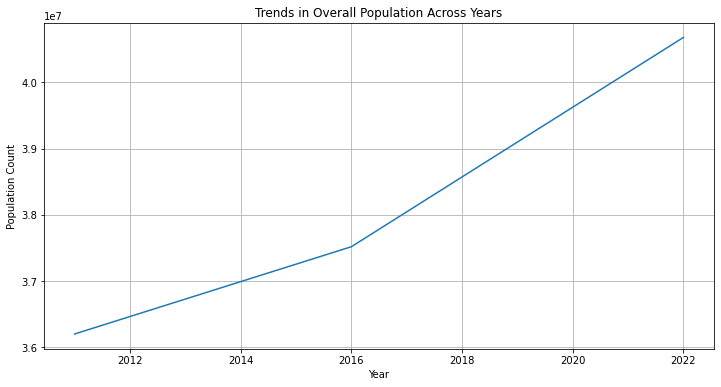

In [27]:
# Group data by Census Year and sum the values
yearwise_data = filtered_population.groupby('CensusYear')['VALUE'].sum()
plt.figure(figsize=(12, 6))
yearwise_data.plot()
plt.title('Trends in Overall Population Across Years')
plt.xlabel('Year')
plt.ylabel('Population Count')
plt.grid(True)
plt.show()

<ipython-input-28-adab4299bd8d>:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


<Figure size 1008x504 with 0 Axes>

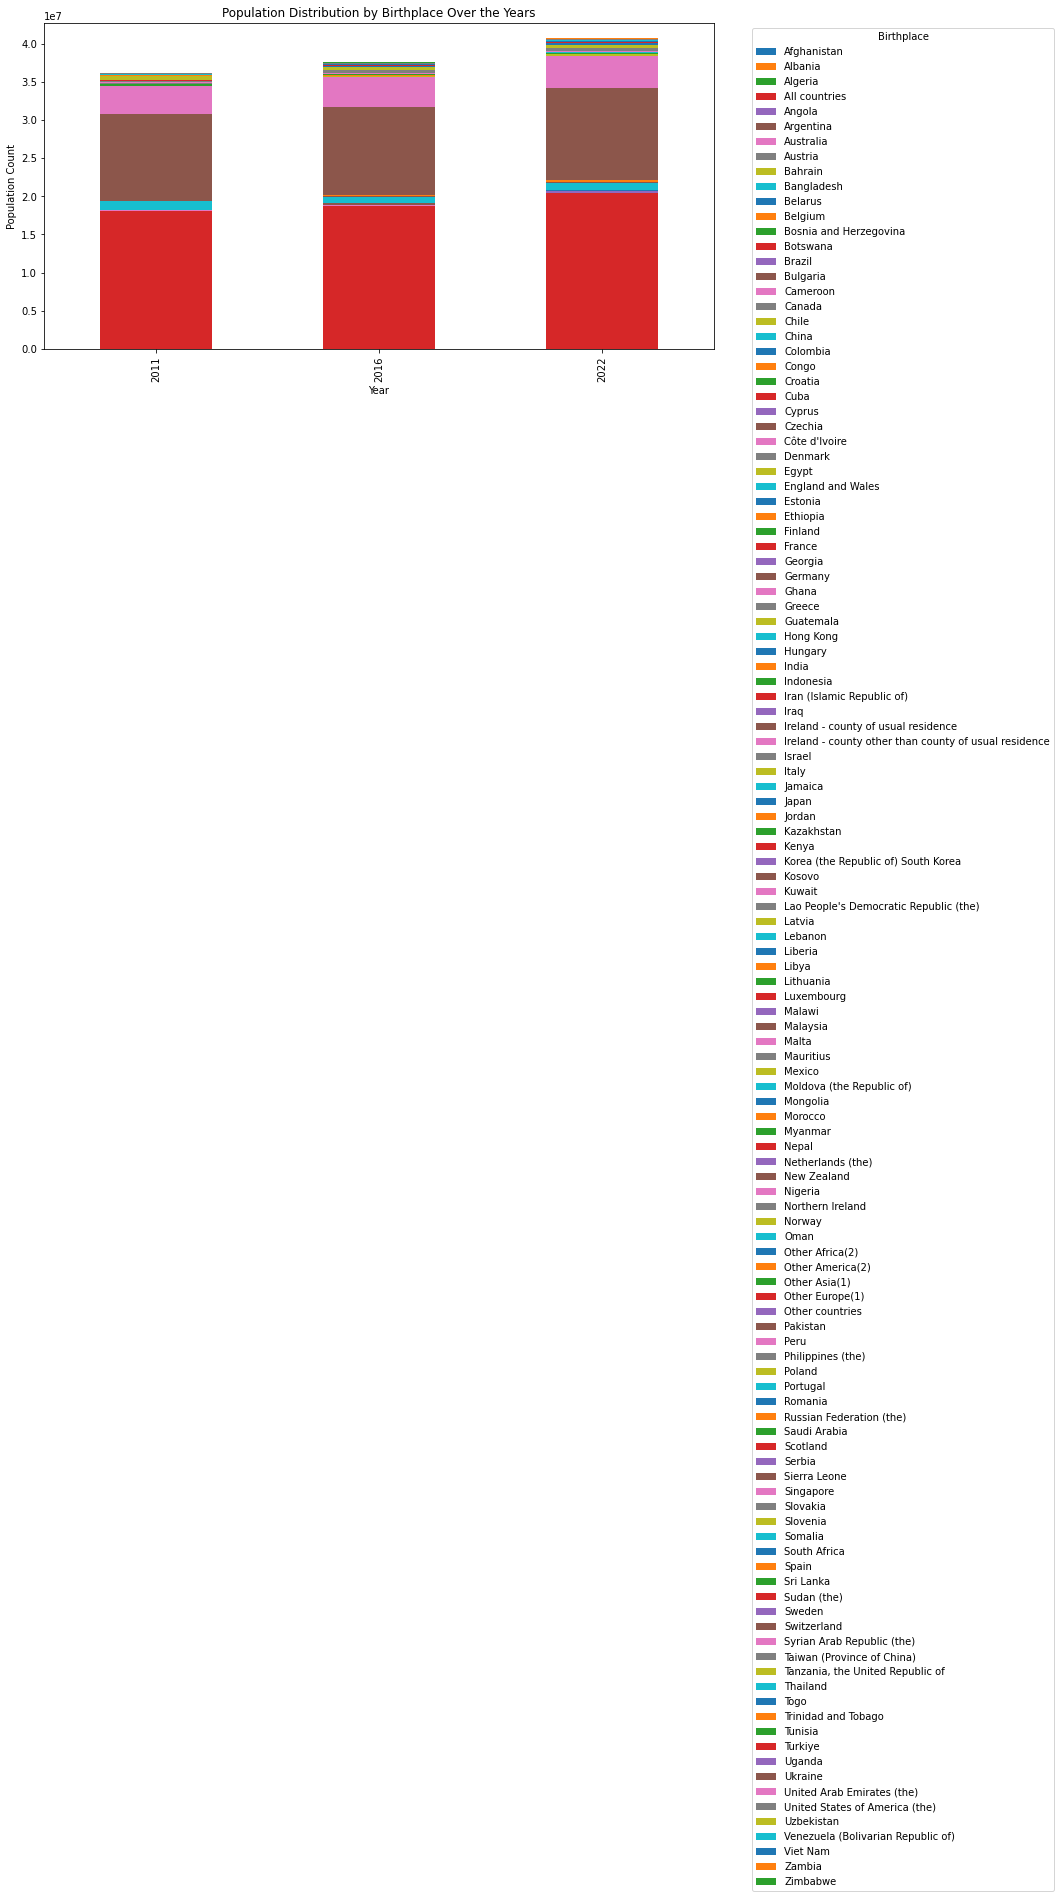

In [28]:
birthplace_data = filtered_population.pivot_table(index='CensusYear', columns='Birthplace', values='VALUE', aggfunc='sum')
birthplace_data = birthplace_data.fillna(0)
plt.figure(figsize=(14, 7))
birthplace_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Population Distribution by Birthplace Over the Years')
plt.xlabel('Year')
plt.ylabel('Population Count')
plt.legend(title='Birthplace', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [29]:
# Adding features for time since the first census and time until the last census
filtered_population['years_since_first_census'] = filtered_population['CensusYear'] - filtered_population['CensusYear'].min()
filtered_population['years_till_last_census'] = filtered_population['CensusYear'].max() - filtered_population['CensusYear']

<ipython-input-29-7cf26c5394ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_population['years_since_first_census'] = filtered_population['CensusYear'] - filtered_population['CensusYear'].min()
<ipython-input-29-7cf26c5394ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_population['years_till_last_census'] = filtered_population['CensusYear'].max() - filtered_population['CensusYear']


In [30]:
# Assuming you're predicting 'VALUE', we'll exclude it from scaling
features_to_scale = ['CensusYear', 'years_since_first_census', 'years_till_last_census']
scaler = StandardScaler()
filtered_population[features_to_scale] = scaler.fit_transform(filtered_population[features_to_scale])

<ipython-input-30-cc9cd6b814e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_population[features_to_scale] = scaler.fit_transform(filtered_population[features_to_scale])


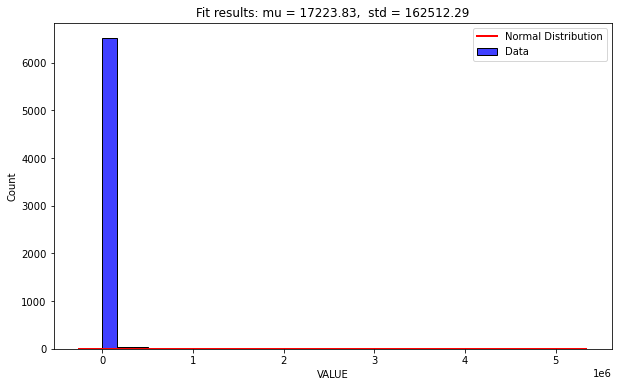

In [31]:
data_values = filtered_population['VALUE']

# Calculating the mean and standard deviation of the data
mu, std = data_values.mean(), data_values.std()

# Plotting the histogram of the data
plt.figure(figsize=(10,6))
sns.histplot(data_values, bins=30, kde=False, color='blue', label='Data')

# Overlaying the normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, color='red', label='Normal Distribution')

title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.legend()
plt.show()

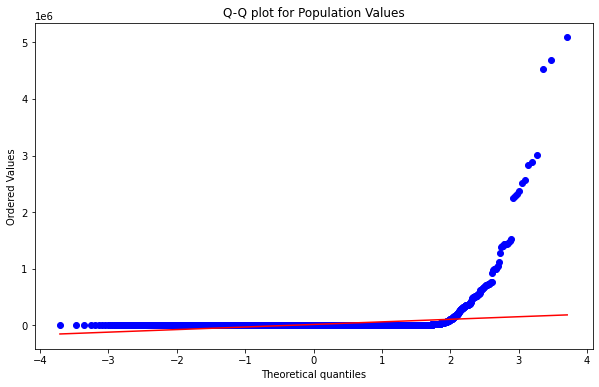

Data does not follow a Normal Distribution


C:\Users\arsal\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [32]:
# Q-Q Plot
plt.figure(figsize=(10,6))
probplot(filtered_population['VALUE'], plot=plt)
plt.title("Q-Q plot for Population Values")
plt.show()
# Shapiro-Wilk Test
stat, p = shapiro(filtered_population['VALUE'])
if p > 0.05:
    print("Data follows a Normal Distribution")
else:
    print("Data does not follow a Normal Distribution")

In [33]:
# Removing 'Statistic Label'
filtered_population.drop(columns=['Statistic Label','UNIT'], inplace=True)
# One-hot encoding
filtered_population_encoded = pd.get_dummies(filtered_population, columns=['Age Group', 'Birthplace', 'Sex'], drop_first=True)
# Splitting the data
X = filtered_population_encoded.drop(columns=['VALUE'])
y = filtered_population_encoded['VALUE']
# RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)
feature_importance = model.feature_importances_

<ipython-input-33-f33b1d9f56a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_population.drop(columns=['Statistic Label','UNIT'], inplace=True)


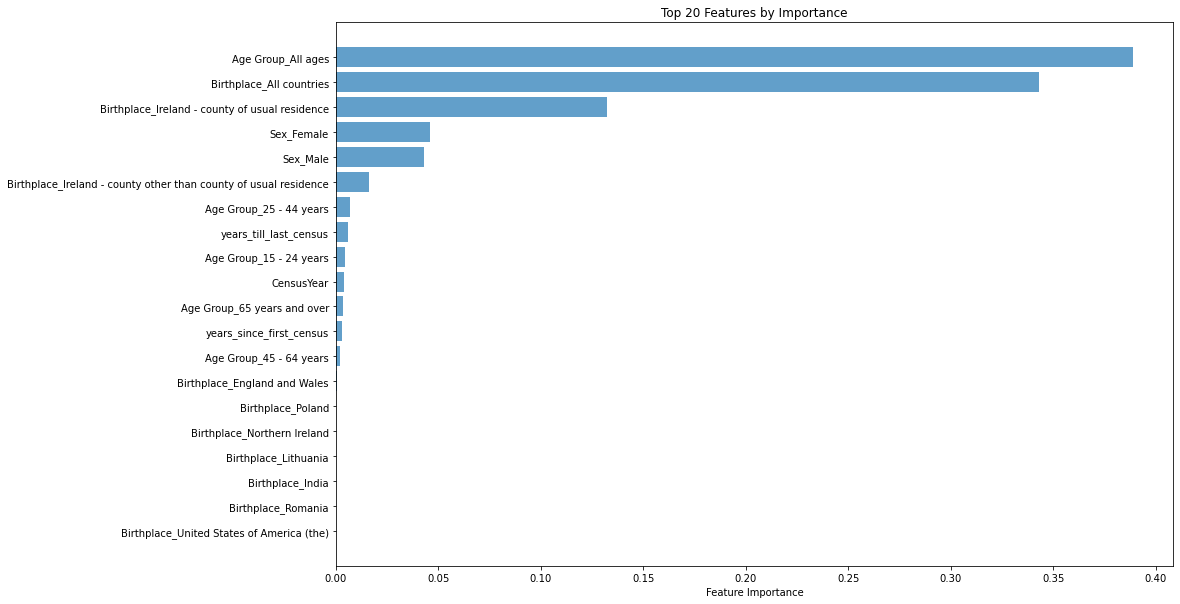

In [34]:
# Associate feature names with their importance scores
features = list(X.columns)
feature_importances = dict(zip(features, feature_importance))
# Sort features by importance
sorted_feature_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)
# Plot top N features
N = 20  # for example, let's plot the top 20 features
top_features = sorted_feature_importances[:N]
labels, values = zip(*top_features)
# Create bar plot
plt.figure(figsize=(15,10))
y_positions = np.arange(len(labels))
plt.barh(y_positions, values, align='center', alpha=0.7)
plt.yticks(y_positions, labels)
plt.xlabel('Feature Importance')
plt.title('Top {} Features by Importance'.format(N))
plt.gca().invert_yaxis()  # to display the most important feature at the top
plt.show()

In [35]:
filtered_population = filtered_population.copy()
filtered_population['VALUE'].fillna(filtered_population['VALUE'].mean(), inplace=True)

In [36]:
scaler = StandardScaler()
filtered_population_encoded['VALUE_scaled'] = scaler.fit_transform(filtered_population_encoded[['VALUE']])

In [37]:
# Create a copy to ensure the original dataframe remains unchanged
df_encoded = filtered_population.copy()
label_encoders = {}  # we'll store our label encoders here for potential use later
# Loop over columns and encode if they're object data type
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le

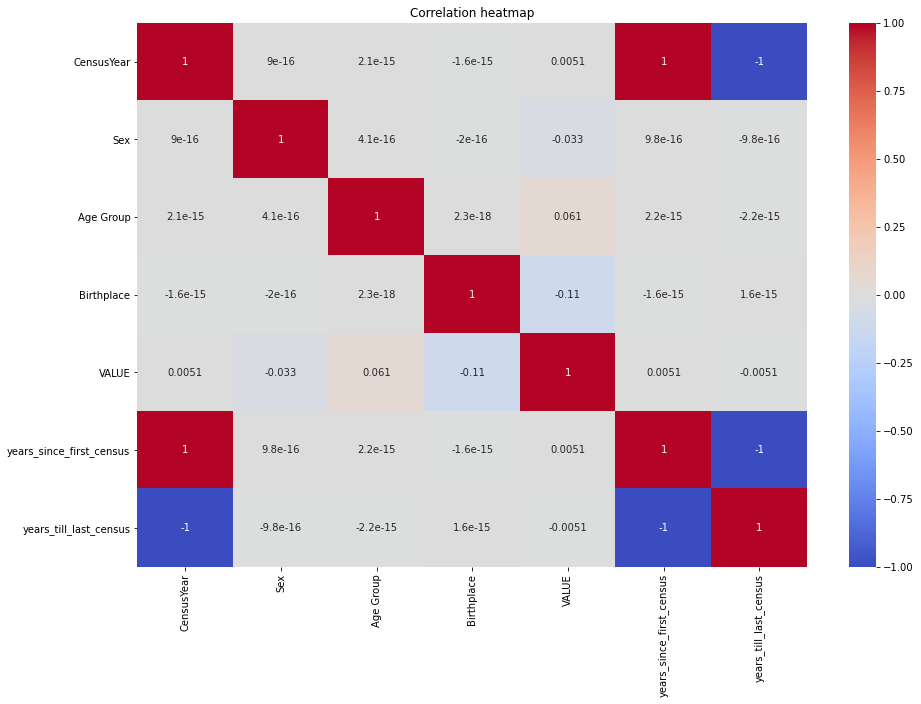

In [38]:
correlations = df_encoded.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.title("Correlation heatmap")
plt.show()

In [39]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Models dictionary
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine": SVR(),
    "Ridge Regression": Ridge()
}

# Train the models and measure MSE
mse_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse_results[name] = mean_squared_error(y_test, predictions)

mse_results

{'Linear Regression': 3414503900.887668,
 'Random Forest': 301395325.48205006,
 'Gradient Boosting': 217500907.43487585,
 'Support Vector Machine': 6408366937.360634,
 'Ridge Regression': 3238089349.404368}

In [41]:
# Initialize the MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
# Fit the model
mlp.fit(X_train, y_train)
# Predict on the test set
y_pred = mlp.predict(X_test)
# Calculate MSE
mse_mlp = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error with MLP Neural Network: {mse_mlp}")

Mean Squared Error with MLP Neural Network: 1328293634.9887218


C:\Users\arsal\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


# Second Dataset

In [42]:
df = pd.read_csv("C:/Users/arsal/Downloads/HEO12.20231024T181025.csv")
df

,Statistic Label,Graduation Year,Gender,Field of Study,NFQ Level,Years Since Graduation,UNIT,VALUE
0,Number of Graduates,2010,All genders,All fields of education,All NFQ Levels,1,Persons,20160.0
1,Number of Graduates,2010,All genders,All fields of education,All NFQ Levels,2,Persons,19820.0
2,Number of Graduates,2010,All genders,All fields of education,All NFQ Levels,3,Persons,19870.0
3,Number of Graduates,2010,All genders,All fields of education,All NFQ Levels,4,Persons,20250.0
4,Number of Graduates,2010,All genders,All fields of education,All NFQ Levels,5,Persons,20670.0
...,...,...,...,...,...,...,...,...
105595,P75 Earnings of Graduates,2019,Other gender,Services,NFQ Level 10,6,Euro,NaN
105596,P75 Earnings of Graduates,2019,Other gender,Services,NFQ Level 10,7,Euro,NaN
105597,P75 Earnings of Graduates,2019,Other gender,Services,NFQ Level 10,8,Euro,NaN
105598,P75 Earnings of Graduates,2019,Other gender,Services,NFQ Level 10,9,Euro,NaN


In [43]:
# Display the first 5 rows
df.head()

,Statistic Label,Graduation Year,Gender,Field of Study,NFQ Level,Years Since Graduation,UNIT,VALUE
0,Number of Graduates,2010,All genders,All fields of education,All NFQ Levels,1,Persons,20160.0
1,Number of Graduates,2010,All genders,All fields of education,All NFQ Levels,2,Persons,19820.0
2,Number of Graduates,2010,All genders,All fields of education,All NFQ Levels,3,Persons,19870.0
3,Number of Graduates,2010,All genders,All fields of education,All NFQ Levels,4,Persons,20250.0
4,Number of Graduates,2010,All genders,All fields of education,All NFQ Levels,5,Persons,20670.0


In [44]:
# Check for missing values
df.isnull().sum()

Statistic Label               0
Graduation Year               0
Gender                        0
Field of Study                0
NFQ Level                     0
Years Since Graduation        0
UNIT                          0
VALUE                     48027
dtype: int64

In [45]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Number of duplicate rows: 0


In [46]:
# Summary statistics for VALUE (earnings)
df['VALUE'].describe()

count    57573.000000
mean       538.059768
std       1155.703426
min          0.000000
25%          0.000000
50%        435.000000
75%        715.000000
max      28870.000000
Name: VALUE, dtype: float64

In [47]:
# Compare average earnings by Gender
gender_comparison = df.groupby('Gender')['VALUE'].mean().reset_index()
print(gender_comparison)

# Compare average earnings by NFQ Level
nfq_comparison = df.groupby('NFQ Level')['VALUE'].mean().reset_index()
print(nfq_comparison)

         Gender       VALUE
0   All genders  707.029011
1        Female  556.953830
2          Male  558.942981
3  Other gender    3.577217
        NFQ Level       VALUE
0  All NFQ Levels  877.476195
1    NFQ Level 10  505.233195
2     NFQ Level 6  260.352852
3     NFQ Level 7  345.214909
4     NFQ Level 8  716.885703
5     NFQ Level 9  498.118958


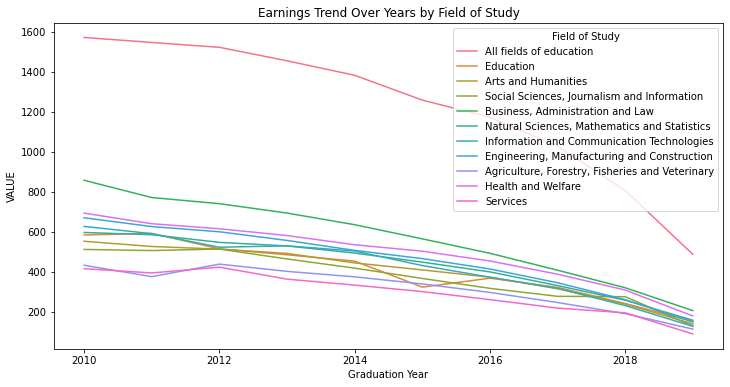

In [48]:
# Earnings trend by Graduation Year
plt.figure(figsize=(12, 6))
sns.lineplot(x='Graduation Year', y='VALUE', hue='Field of Study', data=df)
plt.title('Earnings Trend Over Years by Field of Study')
plt.show()

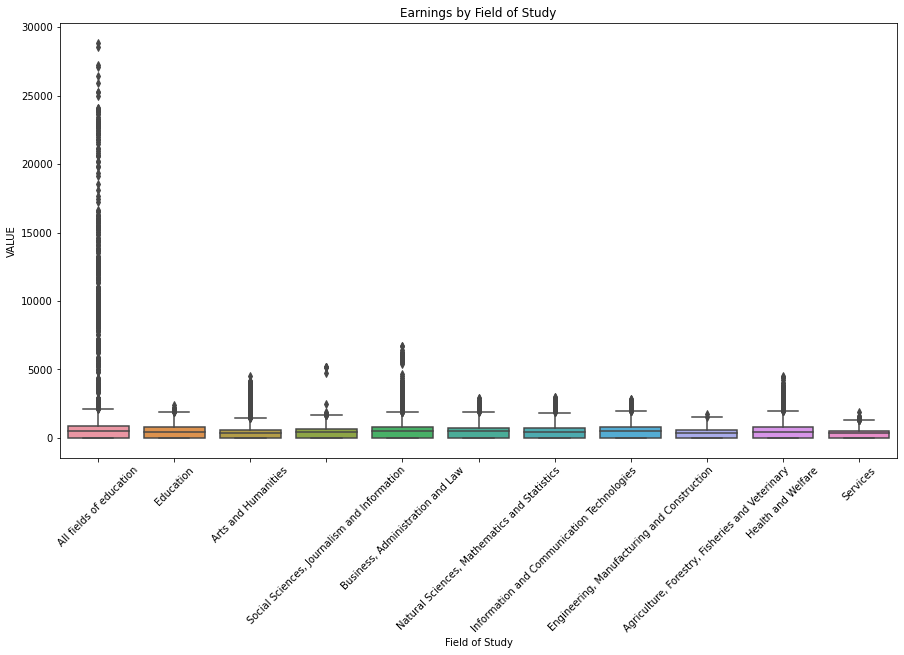

In [49]:
# Set figure size
plt.figure(figsize=(15, 8))
sns.boxplot(x='Field of Study', y='VALUE', data=df)
plt.title('Earnings by Field of Study')
plt.xticks(rotation=45)
plt.show()

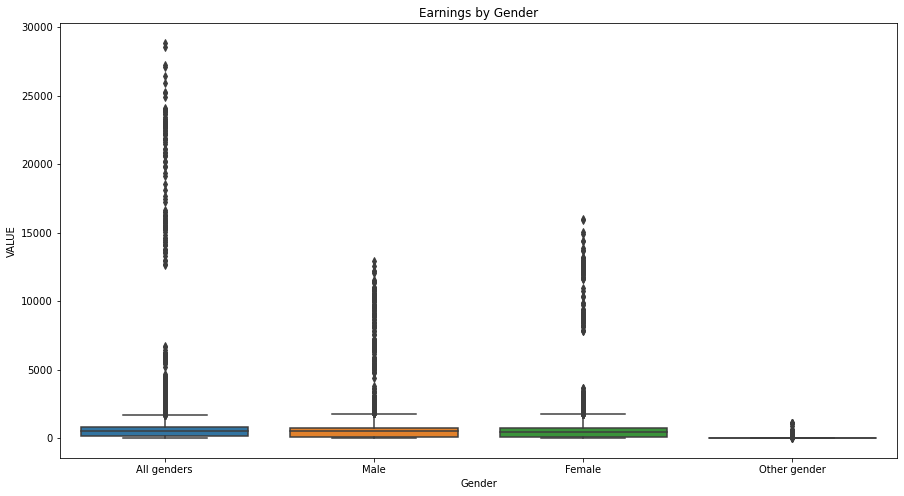

In [50]:
# Set figure size
plt.figure(figsize=(15, 8))
sns.boxplot(x='Gender', y='VALUE', data=df)
plt.title('Earnings by Gender')
plt.show()

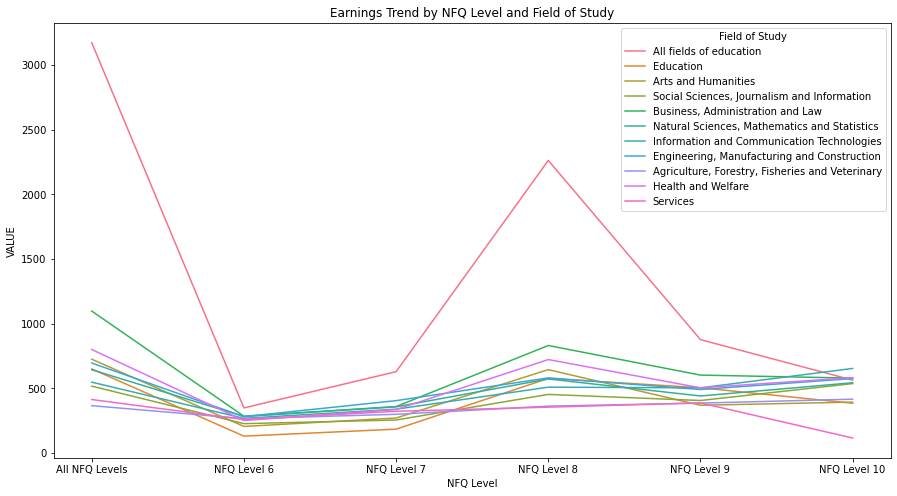

In [51]:
# Set figure size
plt.figure(figsize=(15, 8))
sns.lineplot(x='NFQ Level', y='VALUE', hue='Field of Study', data=df)
plt.title('Earnings Trend by NFQ Level and Field of Study')
plt.show()

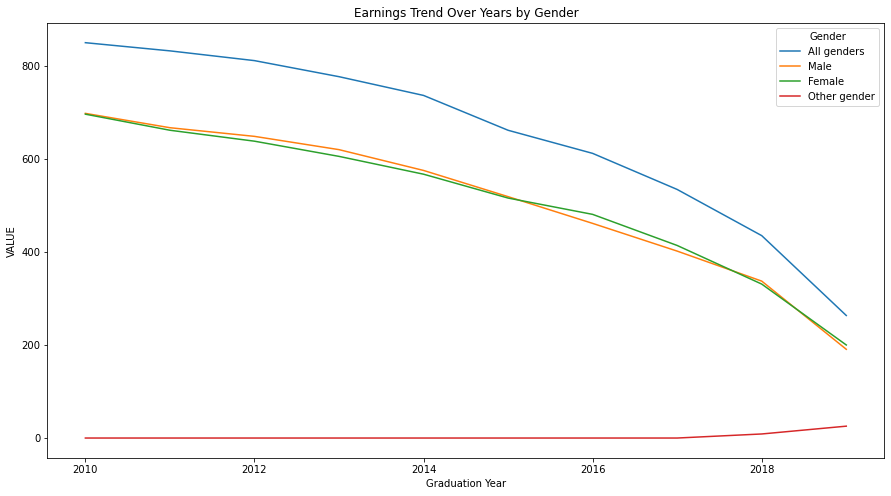

In [52]:
# Set figure size
plt.figure(figsize=(15, 8))
sns.lineplot(x='Graduation Year', y='VALUE', hue='Gender', data=df)
plt.title('Earnings Trend Over Years by Gender')
plt.show()

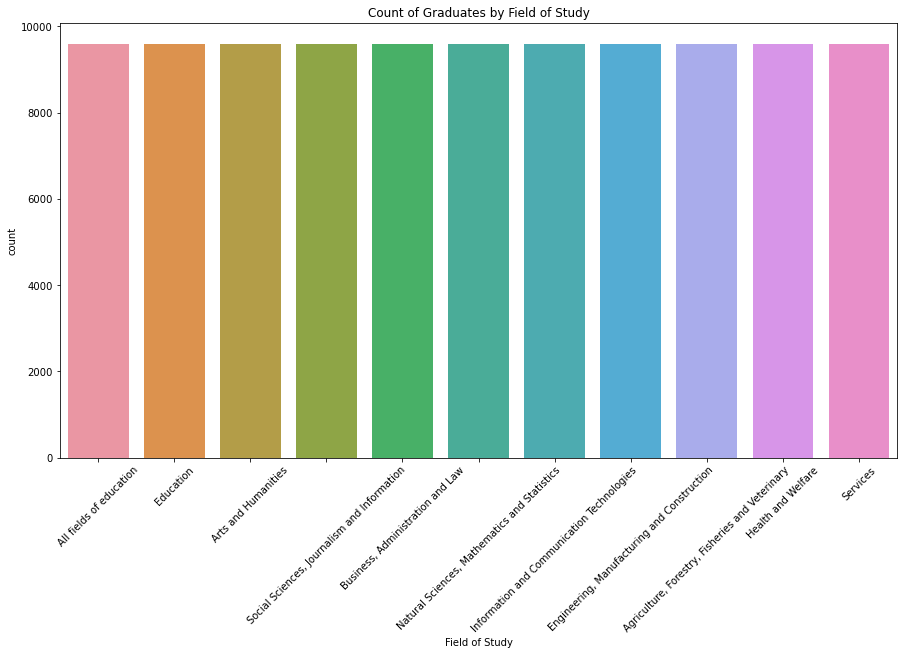

In [53]:
# Set figure size
plt.figure(figsize=(15, 8))
sns.countplot(x='Field of Study', data=df)
plt.title('Count of Graduates by Field of Study')
plt.xticks(rotation=45)
plt.show()

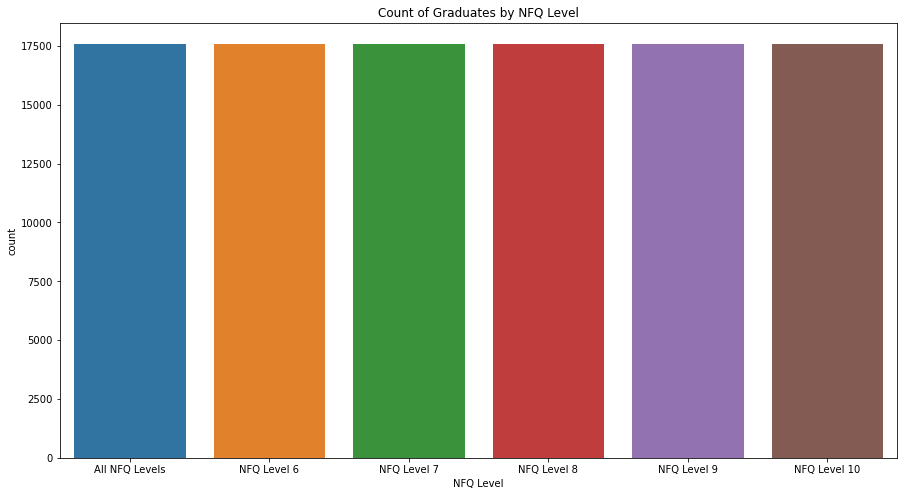

In [54]:
# Set figure size
plt.figure(figsize=(15, 8))
sns.countplot(x='NFQ Level', data=df)
plt.title('Count of Graduates by NFQ Level')
plt.show()

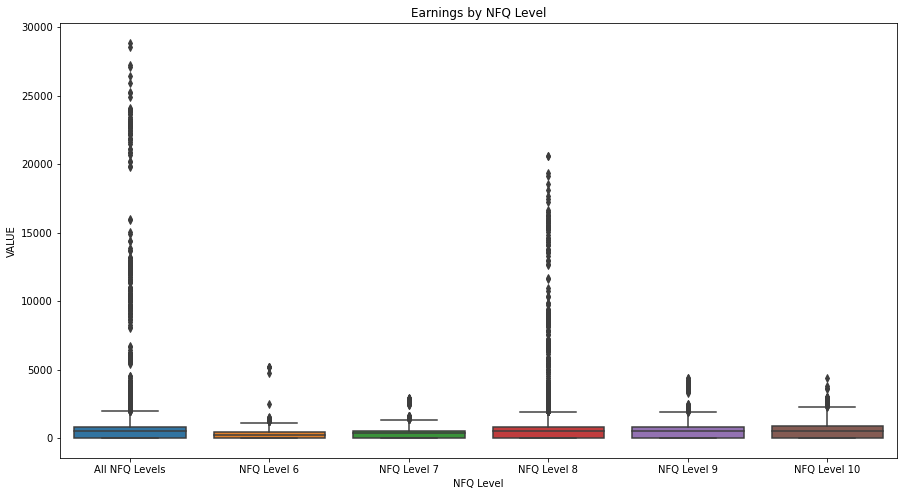

In [55]:
# Set figure size
plt.figure(figsize=(15, 8))
sns.boxplot(x='NFQ Level', y='VALUE', data=df)
plt.title('Earnings by NFQ Level')
plt.show()

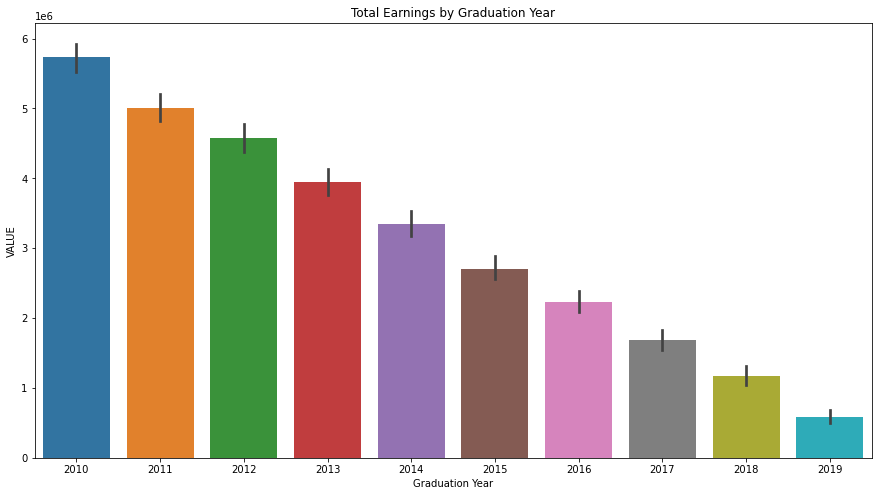

In [56]:
# Set figure size
plt.figure(figsize=(15, 8))
sns.barplot(x='Graduation Year', y='VALUE', data=df, estimator=sum)
plt.title('Total Earnings by Graduation Year')
plt.show()

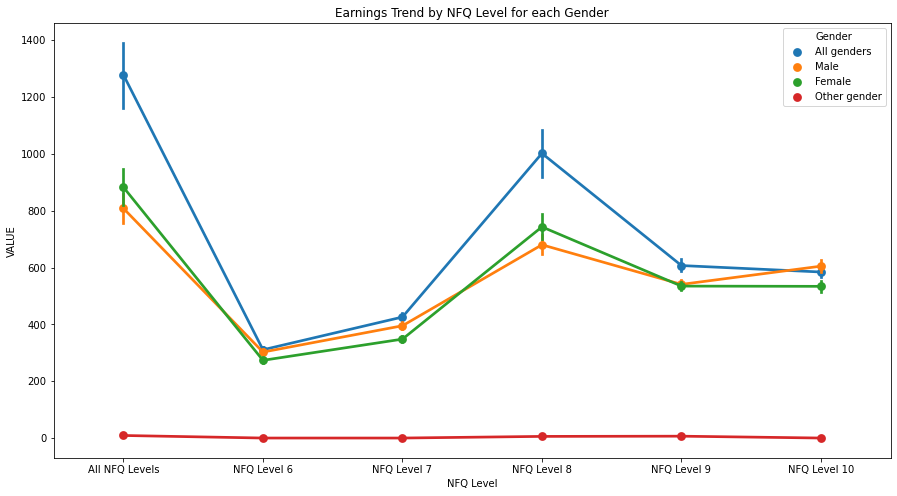

In [57]:
# Set figure size
plt.figure(figsize=(15, 8))
sns.pointplot(x='NFQ Level', y='VALUE', hue='Gender', data=df)
plt.title('Earnings Trend by NFQ Level for each Gender')
plt.show()

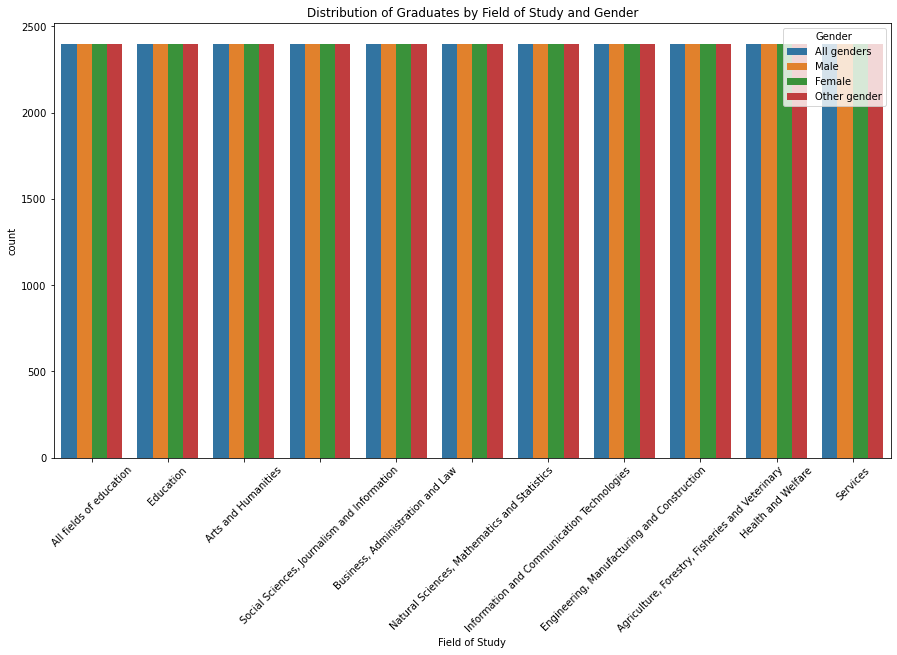

In [58]:
# Set figure size
plt.figure(figsize=(15, 8))
sns.countplot(x='Field of Study', hue='Gender', data=df)
plt.title('Distribution of Graduates by Field of Study and Gender')
plt.xticks(rotation=45)
plt.show()

<Figure size 1080x576 with 0 Axes>

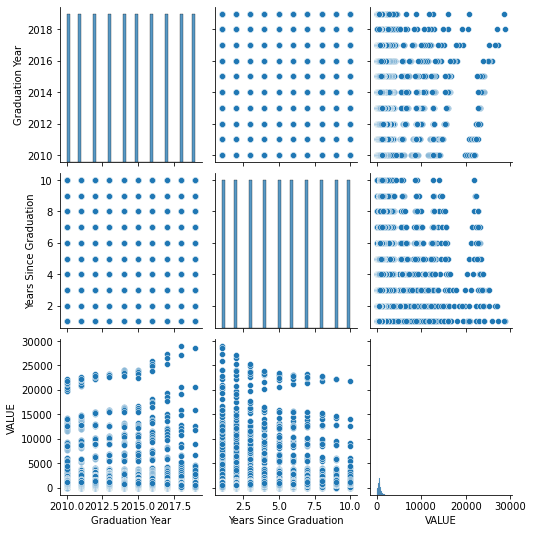

In [59]:
# Set figure size
plt.figure(figsize=(15, 8))
sns.pairplot(df)
plt.show()

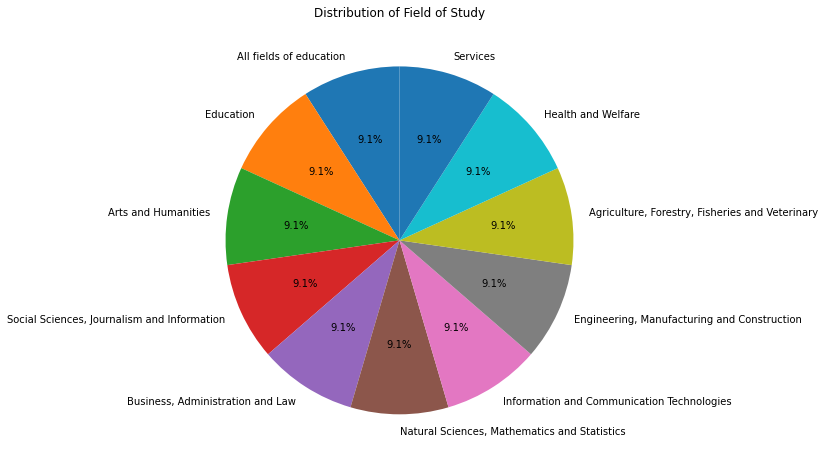

In [60]:
# Set figure size
plt.figure(figsize=(15, 8))
df['Field of Study'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Field of Study')
plt.ylabel('')
plt.show()

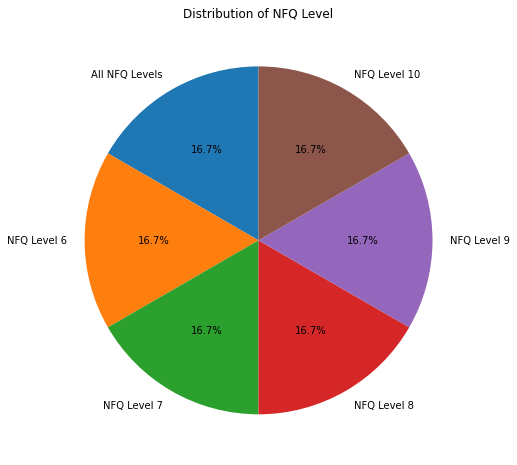

In [61]:
# Set figure size
plt.figure(figsize=(15, 8))
df['NFQ Level'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of NFQ Level')
plt.ylabel('')
plt.show()

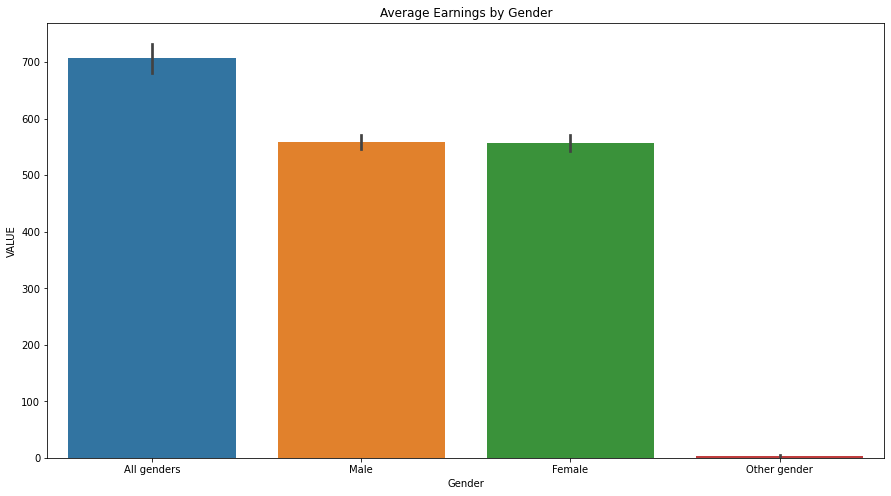

In [62]:
# Set figure size
plt.figure(figsize=(15, 8))
sns.barplot(x='Gender', y='VALUE', data=df)
plt.title('Average Earnings by Gender')
plt.show()

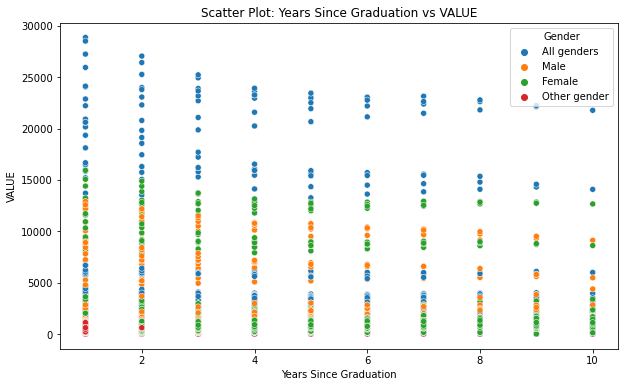

In [63]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Years Since Graduation', y='VALUE', hue='Gender')
plt.title('Scatter Plot: Years Since Graduation vs VALUE')
plt.show()

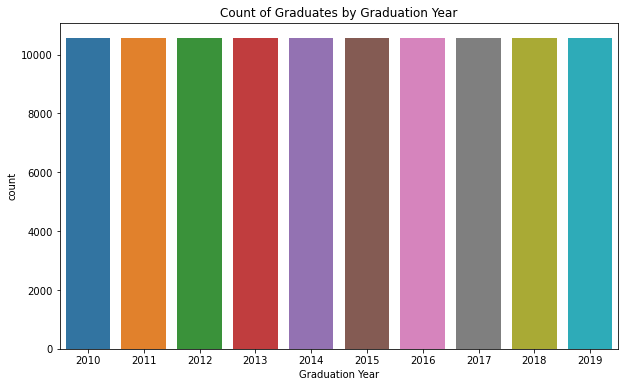

In [64]:
# Count Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Graduation Year')
plt.title('Count of Graduates by Graduation Year')
plt.show()

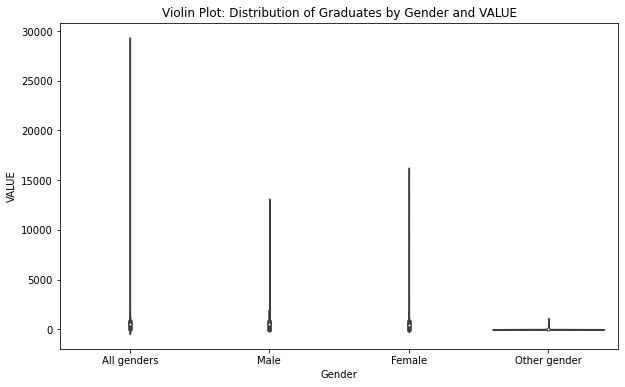

In [65]:
# Violin Plot
plt.figure(figsize=(10, 6))
# Check the number of unique values in the 'Field of Study' column
if len(df['Field of Study'].unique()) == 2:
    sns.violinplot(data=df, x='Gender', y='VALUE', hue='Field of Study', split=True)
else:
    sns.violinplot(data=df, x='Gender', y='VALUE')
plt.title('Violin Plot: Distribution of Graduates by Gender and VALUE')
plt.show()

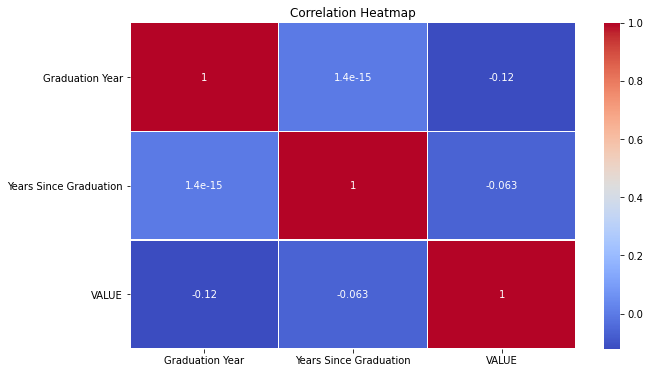

In [66]:
# Heatmap for Correlation
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

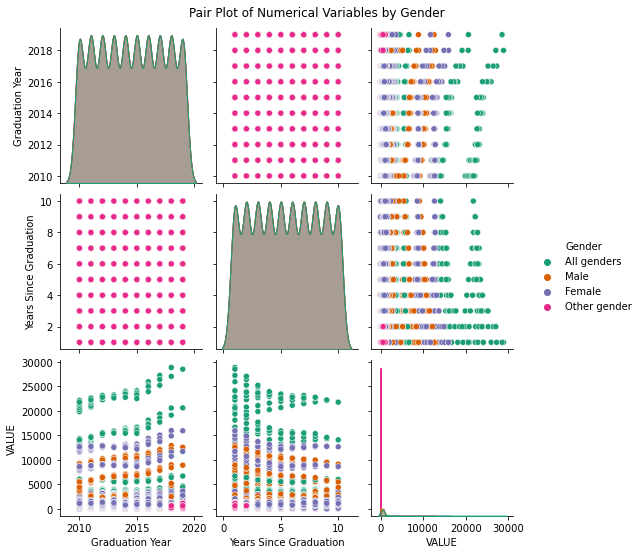

In [67]:
# Pair Plot
sns.pairplot(df, hue='Gender', palette='Dark2', diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Variables by Gender', y=1.02)
plt.show()

(array([1.09419676e-03, 5.19603578e-04, 7.04516633e-05, 1.60637012e-05,
        1.01074974e-05, 4.96350318e-06, 4.12121173e-06, 6.31718587e-07,
        3.30900212e-07, 5.71554912e-07, 1.47401004e-06, 5.11391237e-07,
        3.30900212e-07, 2.40654700e-07, 5.71554912e-07, 1.11302799e-06,
        3.91063887e-07, 4.21145724e-07, 4.51227562e-07, 1.50409187e-07,
        3.00818375e-07, 7.52045936e-07, 7.21964099e-07, 2.10572862e-07,
        2.40654700e-07, 1.50409187e-07, 3.60982049e-07, 3.30900212e-07,
        2.10572862e-07, 3.00818375e-08, 6.01636749e-08, 3.00818375e-08,
        3.00818375e-08, 6.01636749e-08, 9.02455124e-08, 1.20327350e-07,
        1.20327350e-07, 1.50409187e-07, 1.80491025e-07, 3.91063887e-07,
        2.10572862e-07, 1.80491025e-07, 0.00000000e+00, 9.02455124e-08,
        3.00818375e-08, 3.00818375e-08, 3.00818375e-08, 3.00818375e-08,
        0.00000000e+00, 6.01636749e-08]),
 array([    0. ,   577.4,  1154.8,  1732.2,  2309.6,  2887. ,  3464.4,
         4041.8,  4619.

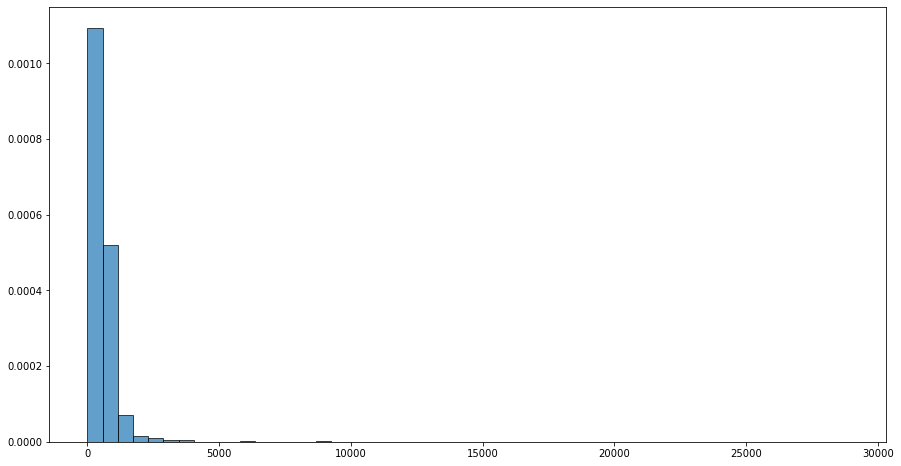

In [68]:
# Extracting the 'VALUE' data after dropping NaN values
values = df['VALUE'].dropna().values
# Set figure size
plt.figure(figsize=(15, 8))
# Plotting histogram using matplotlib
plt.hist(values, bins=50, edgecolor='k', alpha=0.7, density=True)

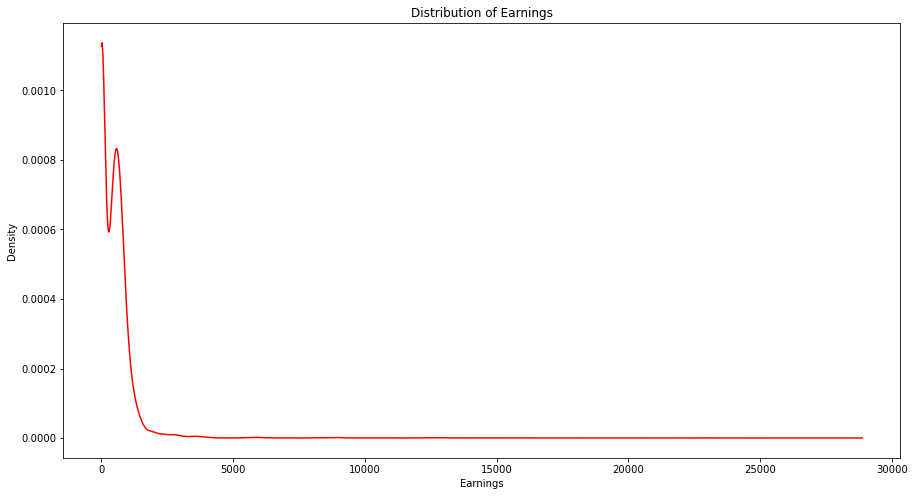

In [69]:
# KDE (Kernel Density Estimation)
from scipy.stats import gaussian_kde
density = gaussian_kde(values)
xs = np.linspace(min(values), max(values), 1000)
# Set figure size
plt.figure(figsize=(15, 8))
plt.plot(xs, density(xs), color='r')
plt.title('Distribution of Earnings')
plt.xlabel('Earnings')
plt.ylabel('Density')
plt.show()

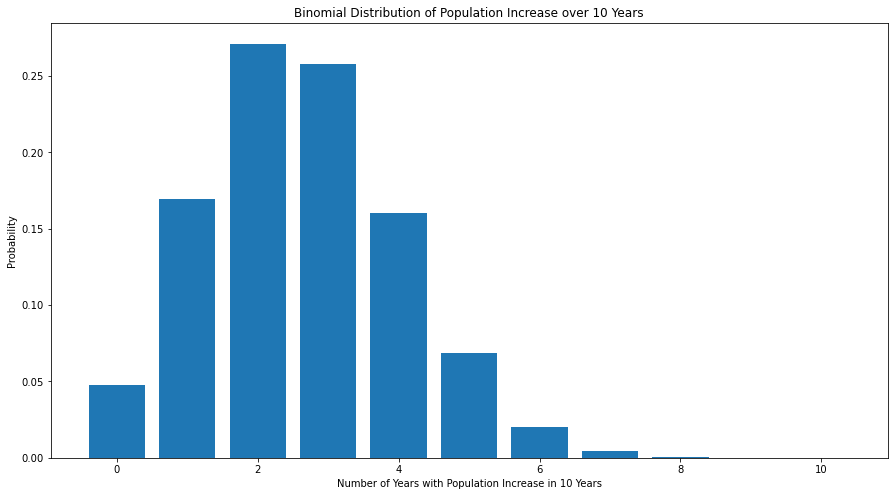

In [70]:
# Assuming your dataset is sorted by year and has a column named 'Population'
df['Population_Increase'] = (df['VALUE'].diff() > 0).astype(int)
# Probability of population increase in a given year
p = df['Population_Increase'].mean()
# Visualize the binomial distribution for n trials (e.g., 10 years)
n = 10
x = range(n+1)
binomial_distribution = [binom.pmf(k, n, p) for k in x]
# Set figure size
plt.figure(figsize=(15, 8))
plt.bar(x, binomial_distribution)
plt.xlabel('Number of Years with Population Increase in 10 Years')
plt.ylabel('Probability')
plt.title('Binomial Distribution of Population Increase over 10 Years')
plt.show()

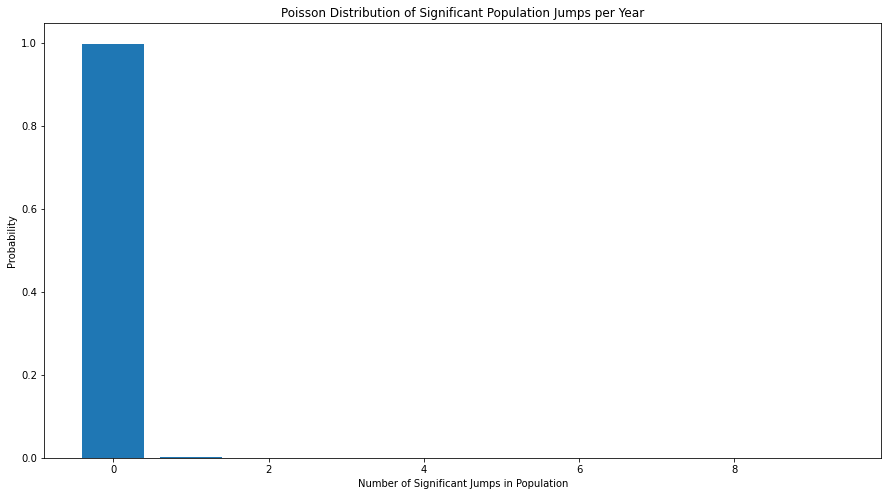

In [71]:
# Assuming a threshold for significant jumps, for example, 5000
threshold = 5000
df['Significant_Jump'] = (df['VALUE'].diff().abs() > threshold).astype(int)
# Average number of significant jumps in a given period (e.g., per year)
lambda_val = df['Significant_Jump'].mean()
# Visualize the Poisson distribution for a given period
x = range(10)  
poisson_distribution = [poisson.pmf(k, lambda_val) for k in x]
# Set figure size
plt.figure(figsize=(15, 8))
plt.bar(x, poisson_distribution)
plt.xlabel('Number of Significant Jumps in Population')
plt.ylabel('Probability')
plt.title('Poisson Distribution of Significant Population Jumps per Year')
plt.show()

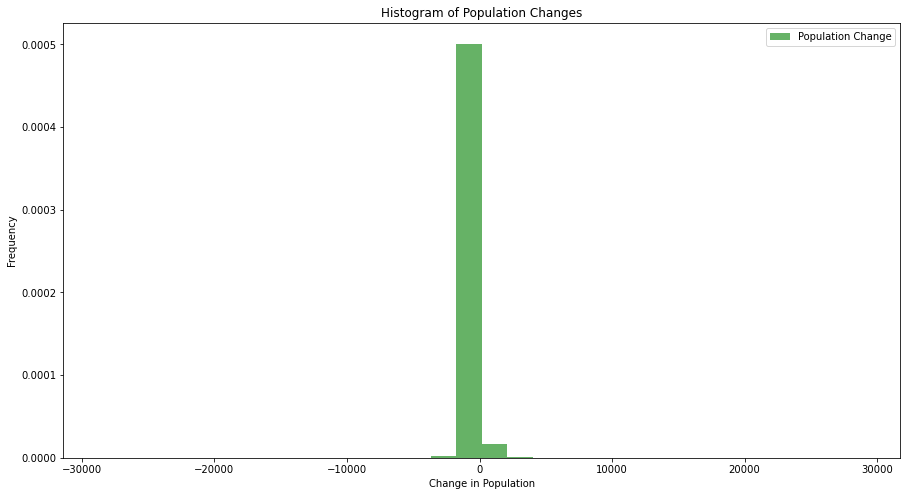

In [72]:
population_diff = df['VALUE'].diff().dropna()
# Set figure size
plt.figure(figsize=(15, 8))
plt.hist(population_diff, bins=30, density=True, alpha=0.6, color='g', label='Population Change')
plt.title('Histogram of Population Changes')
plt.xlabel('Change in Population')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [73]:
stat, p = shapiro(population_diff)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Population change appears to be normally distributed (fail to reject H0)')
else:
    print('Population change does not appear to be normally distributed (reject H0)')

Statistics=0.123, p=0.000
Population change does not appear to be normally distributed (reject H0)


C:\Users\arsal\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


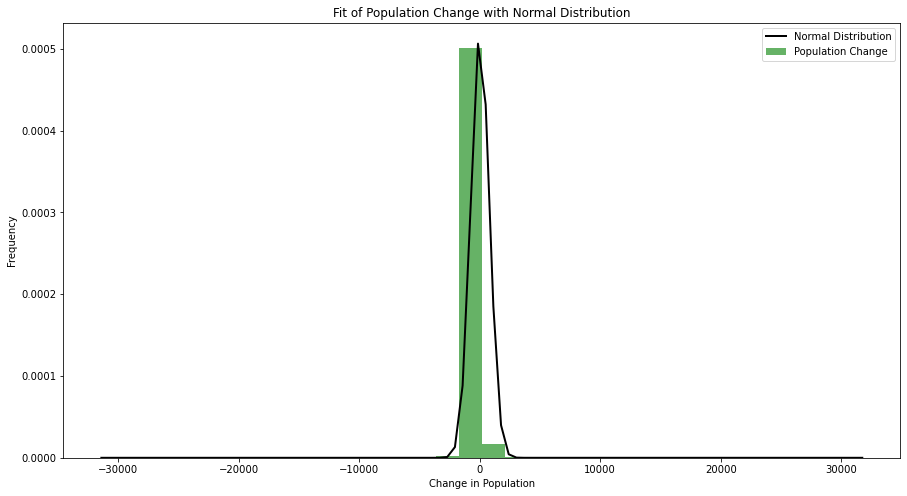

In [74]:
# Set figure size
plt.figure(figsize=(15, 8))
# Plotting the histogram
plt.hist(population_diff, bins=30, density=True, alpha=0.6, color='g', label='Population Change')
# Plotting the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, population_diff.mean(), population_diff.std())
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')
plt.title('Fit of Population Change with Normal Distribution')
plt.xlabel('Change in Population')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [75]:
#Drop unnecessary columns
df = df.drop(['Statistic Label', 'UNIT'], axis=1)

In [76]:
#Label Encoding
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [77]:
# Drop rows where 'VALUE' is NaN
df = df.dropna(subset=['VALUE'])

In [78]:
# Splitting the data again after dropping NaN rows
X = df.drop('VALUE', axis=1)
y = df['VALUE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
# Model Training with GridSearchCV
models = {
    'RandomForest': (RandomForestRegressor(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5]
    }),
    'GradientBoosting': (GradientBoostingRegressor(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    }),
    'LinearRegression': (LinearRegression(), {}),
    'SVR': (SVR(), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }),
    'DecisionTree': (DecisionTreeRegressor(), {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5]
    })
}

In [ ]:
for name, (model, parameters) in models.items():
    gs = GridSearchCV(model, parameters, cv=3, n_jobs=-1, verbose=1)
    gs.fit(X_train, y_train)
    print(f"Best parameters for {name}: {gs.best_params_}")
    predictions = gs.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print(f"Mean Squared Error for {name}: {mse}\n")

Fitting 3 folds for each of 24 candidates, totalling 72 fits
